In [ ]:
from tensorflow.keras.applications import ResNet50

In [3]:
model = ResNet50(weights='imagenet')

In [4]:
from tensorflow.keras.models import load_model

In [5]:
# Build Keras Resnet50 model

model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

## Import and preprocess 3 sample images

In [ ]:
from PIL import Image

In [7]:
# Import 3 sample ImageNet images

from tensorflow.keras.preprocessing.image import load_img

lemon_img = load_img('./lemon.jpeg', target_size=(224, 224))
water_tower_img = load_img('./water-tower.jpeg', target_size=(224, 224))

# Use ResNet50 model to classify images

In [8]:
# Useful function: presentes top 5 predictions and probabilities

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...]
    x = preprocess_input(x)
    preds = decode_predictions(model.predict(x), top=5)
    top_preds = pd.DataFrame(columns=['prediction', 'probability'],
                            index=np.arange(5)+1)
    for i in range(5):
        top_preds.loc[i+1, 'prediction'] = preds[0][i][1]
        top_preds.loc[i+1, 'probability'] = preds[0][i][2]
    return top_preds

#### Image 1: lemon

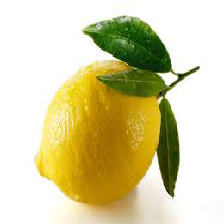

In [9]:
# Display image

lemon_img

In [10]:
# Display top 5 predictions

get_top_5_predictions(lemon_img)

,prediction,probability
1,lemon,0.994088
2,orange,0.00290832
3,yellow_lady's_slipper,0.00244507
4,spaghetti_squash,0.000243197
5,plate,7.45657e-05


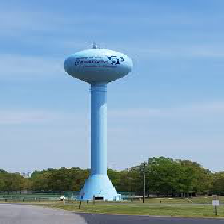

In [11]:
# Display image

water_tower_img

In [12]:
# Display top 5 predictions

get_top_5_predictions(water_tower_img)

,prediction,probability
1,water_tower,0.907093
2,airship,0.0435439
3,pedestal,0.0120173
4,solar_dish,0.00971621
5,beacon,0.00661524


# TensorFlow Hub modules

In [1]:
from tensorflow.keras.models import load_model, Sequential
import tensorflow_hub as hub

In [2]:
module_url = 'https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4'
model = Sequential([hub.KerasLayer(module_url)])
model.build(input_shape=[None, 160, 160, 3])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              1343049   
Total params: 1,343,049
Trainable params: 0
Non-trainable params: 1,343,049
_________________________________________________________________


### Use MobileNet model to classify images

In [4]:
# Import and preprocess 3 sample ImageNet images

from tensorflow.keras.preprocessing.image import load_img, img_to_array

lemon_img = load_img('lemon.jpeg', target_size=(160, 160))
water_tower_img = load_img('water-tower.jpeg', target_size=(160, 160))

In [5]:
# Read in categories text file

with open('imagenet_categories.txt') as txt_file:
    categories = txt_file.read().splitlines()

In [10]:
import numpy as np
import pandas as pd

def get_top5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...] / 255.0
    preds = model.predict(x)
    top_preds = pd.DataFrame(columns=['prediction'],
                            index=np.arange(5)+1)
    sorted_index = np.argsort(-preds[0])
    for i in range(5):
        ith_pred = categories[sorted_index[i]]
        top_preds.loc[i+1, 'prediction'] = ith_pred
    
    return top_preds

##### Image 1: lemon

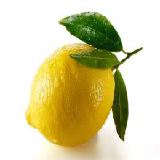

In [8]:
lemon_img

In [11]:
get_top5_predictions(lemon_img)

,prediction
1,"952: 'fig',"
2,"941: 'acorn squash',"
3,"987: 'corn',"
4,"951: 'lemon',"
5,"950: 'orange',"


In [12]:
get_top5_predictions(water_tower_img)

,prediction
1,"901: 'whiskey jug',"
2,"575: 'golfcart, golf cart',"
3,"756: 'rain barrel',"
4,"808: 'sombrero',"
5,"406: 'altar',"
